#  The prediction score(categorization acuuracy) = 0.79425 for the test set on Kaggle.

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
from __future__ import print_function
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.grid_search import GridSearchCV

C:\Users\Anirudh Arputham\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Anirudh Arputham\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Load the training and tets datasets

train = pd.read_csv("C:\Users\Anirudh Arputham\Desktop\my files-iitb\SEM 4\Datasets\Titanic Dataset/train.csv")
test = pd.read_csv("C:\Users\Anirudh Arputham\Desktop\my files-iitb\SEM 4\Datasets\Titanic Dataset/test.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# Fill the empty values in the 'Embarked columns'

train['Embarked'] = train['Embarked'].fillna('S')

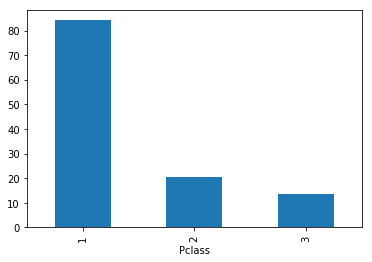

In [6]:
# to check for the relation between the mean price sof a ticket in the first, second and the third classes.

train.groupby('Pclass').mean()['Fare'].plot(kind = "bar")

In [7]:
# to create a new feature called 'Title' which gives us an idea of the social status of the passengers and 
# hence gives us an idea on whether a particular passenger was saved 

# first do it for the training data

train['Title'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
# we map each title to the categories mentioned in the map
train['Title'] = train.Title.map(Title_Dictionary)

In [8]:
# Now do it for the test data

test['Title'] = test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }

test['Title'] = test.Title.map(Title_Dictionary)

In [9]:
# Now that we have the titles, the names are useless

train.drop(['Name'],axis = 1,inplace = True)
test.drop(['Name'],axis = 1,inplace = True)

In [10]:
train.drop(['Ticket'],axis = 1,inplace = True)
test.drop(['Ticket'],axis = 1,inplace = True)

In [11]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,Mr
5,6,0,3,male,NaN,0,0,8.4583,NaN,Q,Mr
6,7,0,1,male,54.0,0,0,51.8625,E46,S,Mr
7,8,0,3,male,2.0,3,1,21.0750,NaN,S,Master
8,9,1,3,female,27.0,0,2,11.1333,NaN,S,Mrs
9,10,1,2,female,14.0,1,0,30.0708,NaN,C,Mrs


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [13]:
x = train.groupby(['Sex','Pclass','Title'])
z = test.groupby(['Sex','Pclass','Title'])

In [14]:
y = x.median()['Age']['female'][1]['Royalty']

In [15]:
train.drop(['Cabin'],axis = 1,inplace = True)
test.drop(['Cabin'],axis = 1,inplace = True)
x.median()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [18]:
# find the only value of fare which is not filled

test[test['Fare'].isnull() == True]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
152,1044,3,male,60.5,0,0,NaN,S,Mr


In [19]:
# fill it in with the median of the fares

test.set_value(152,'Fare',7.895)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr
1,893,3,female,47.0,1,0,7.0000,S,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,Mr
3,895,3,male,27.0,0,0,8.6625,S,Mr
4,896,3,female,22.0,1,1,12.2875,S,Mrs
5,897,3,male,14.0,0,0,9.2250,S,Mr
6,898,3,female,30.0,0,0,7.6292,Q,Miss
7,899,2,male,26.0,1,1,29.0000,S,Mr
8,900,3,female,18.0,0,0,7.2292,C,Mrs
9,901,3,male,21.0,2,0,24.1500,S,Mr


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [21]:
test[test.index == 152]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
152,1044,3,male,60.5,0,0,7.895,S,Mr


In [22]:
# now to fill in the ages of the people which ae left missing
# What we do is group all the data by the sex, class and title and fill it in with the median of each group's ages.
    
def fillAges(row, grouped_median):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['female', 1, 'Royalty']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['male', 1, 'Royalty']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 2, 'Officer']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']
    
train.Age = train.apply(lambda r : fillAges(r, x.median()) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    
test.Age = test.apply(lambda r : fillAges(r, z.median()) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [25]:
# we add a dummy column survived to the test set so that the function dmatrice can convert the test set into a more useful 
# dataframe by assigning values to the cateogorical variables

test['Survived'] = 2

In [26]:
test['age'] = (76 - test['Age'])*test['Fare']
train['age'] = (80 - train['Age'])*train['Fare']

In [27]:
# Defining the formula for creating the useful dataframe.
# here we use C() to indicate that the feature is Categorical

formula = 'Survived ~ C(Sex) + C(Pclass) + C(Embarked) + Age + age + C(Pclass):Age + Fare + C(Title) + C(Pclass):Fare'

In [28]:
y_train,x_train = dmatrices(formula,data = train,return_type = "dataframe")
y_test,x_test = dmatrices(formula,data = test,return_type = "dataframe")

In [29]:
x_train

,Intercept,C(Sex)[T.male],C(Pclass)[T.2],C(Pclass)[T.3],C(Embarked)[T.Q],C(Embarked)[T.S],C(Title)[T.Miss],C(Title)[T.Mr],C(Title)[T.Mrs],C(Title)[T.Officer],C(Title)[T.Royalty],Age,C(Pclass)[T.2]:Age,C(Pclass)[T.3]:Age,age,Fare,C(Pclass)[T.2]:Fare,C(Pclass)[T.3]:Fare
0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,22.0,0.0,22.0,420.5000,7.2500,0.0000,7.2500
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,38.0,0.0,0.0,2993.8986,71.2833,0.0000,0.0000
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,26.0,0.0,26.0,427.9500,7.9250,0.0000,7.9250
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,0.0,0.0,2389.5000,53.1000,0.0000,0.0000
4,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,35.0,0.0,35.0,362.2500,8.0500,0.0000,8.0500
5,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,26.0,0.0,26.0,456.7482,8.4583,0.0000,8.4583
6,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,54.0,0.0,0.0,1348.4250,51.8625,0.0000,0.0000
7,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1643.8500,21.0750,0.0000,21.0750
8,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,27.0,0.0,27.0,590.0649,11.1333,0.0000,11.1333
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14.0,14.0,0.0,1984.6728,30.0708,30.0708,0.0000


In [30]:
# we will use the Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 50,max_features = 'sqrt')

In [31]:
clf.fit(x_train,y_train)

C:\Users\Anirudh Arputham\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [32]:
features = pd.DataFrame()
features['feature'] = x_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

In [33]:
np.shape(clf.feature_importances_)

(18L,)

In [34]:
np.shape(x_train.columns)

(18L,)

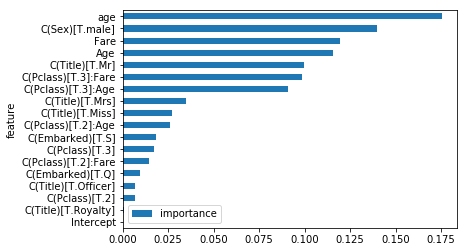

In [35]:
features.plot(kind = "barh")

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score

parameter_grid = {
                 'max_depth' : [4,5, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3,4,5, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
forest = RandomForestClassifier()
cross_validation = StratifiedKFold(train.Survived, n_folds=5)

grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

grid_search.fit(x_train,y_train )
model = grid_search
parameters = grid_search.best_params_
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


C:\Users\Anirudh Arputham\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:1665: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Best score: 0.837261503928
Best parameters: {'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 10, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 8}


C:\Users\Anirudh Arputham\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\grid_search.py:619: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_estimator.fit(X, y, **self.fit_params)


In [38]:
parameters

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [39]:
# create a model with the parameters that optimizes the fit to the data

m = RandomForestClassifier(bootstrap= True, min_samples_leaf= 1, n_estimators= 10, 
                  min_samples_split= 2, max_features= 'log2', max_depth= 8)

In [40]:
m.fit(x_train,y_train)

C:\Users\Anirudh Arputham\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [41]:
# predict wheteher the passengers in the test set will survive or not and pass them in to a csv file

y = m.predict(x_test)
Y = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':y}) 
Y['Survived'] = Y['Survived'].astype(int)
Y.to_csv("C:\Users\Anirudh Arputham\Desktop\my files-iitb\SEM 4\Datasets\Titanic Dataset/y_f.csv",index = False)